In [14]:
import os
import numpy as np
import pandas as pd

In [15]:
# Paths
data_dir = 'data/'
pos_train_path = os.path.join(data_dir, "train_pos_full.txt")
neg_train_path = os.path.join(data_dir, "train_neg_full.txt")
test_path = os.path.join(data_dir, "test_data.txt")

In [16]:
# Load the data
with open(pos_train_path, 'r', encoding='utf-8') as f:
    pos_tweets = f.read().splitlines()

with open(neg_train_path, 'r', encoding='utf-8') as f:
    neg_tweets = f.read().splitlines()

with open(test_path, 'r', encoding='utf-8') as f:
    test_tweets = f.read().splitlines()

# Convert to DataFrames
pos_df = pd.DataFrame({'tweet': pos_tweets, 'label': 1})
neg_df = pd.DataFrame({'tweet': neg_tweets, 'label': 0})
test_df = pd.DataFrame({'tweet': test_tweets})

# Combine datasets
train_df = pd.concat([pos_df, neg_df], ignore_index=True)

### 1. Check for Missing values in our data

In [19]:
print("Missing values in train_df:")
print(train_df.isnull().sum())


Missing values in train_df:
tweet    0
label    0
dtype: int64


### 2. Check our label distribution, to see if we have imbalanced class

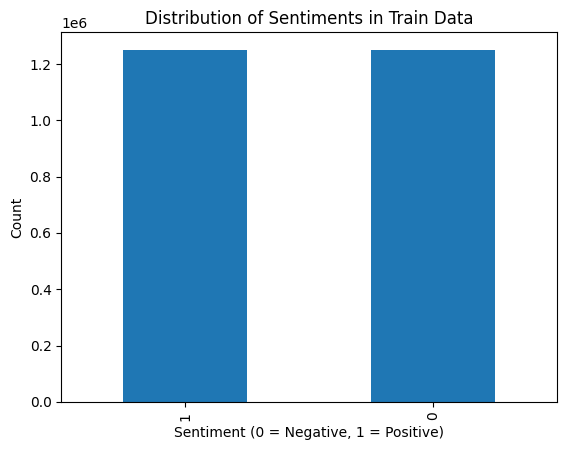

In [21]:
import matplotlib.pyplot as plt

# Distribution of labels in train data
train_df['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Sentiments in Train Data")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


### 3. Text length Analysis

In [22]:
# Add length column
train_df['tweet_length'] = train_df['tweet'].apply(len)
test_df['tweet_length'] = test_df['tweet'].apply(len)

# Summary statistics
print("Tweet Length Summary (Train):")
print(train_df['tweet_length'].describe())

print("\nTweet Length Summary (Test):")
print(test_df['tweet_length'].describe())


Tweet Length Summary (Train):
count    2.500000e+06
mean     7.596408e+01
std      3.542579e+01
min      3.000000e+00
25%      4.600000e+01
50%      7.100000e+01
75%      1.110000e+02
max      4.010000e+02
Name: tweet_length, dtype: float64

Tweet Length Summary (Test):
count    10000.000000
mean        80.729700
std         34.931852
min         15.000000
25%         51.000000
50%         75.000000
75%        115.000000
max        176.000000
Name: tweet_length, dtype: float64


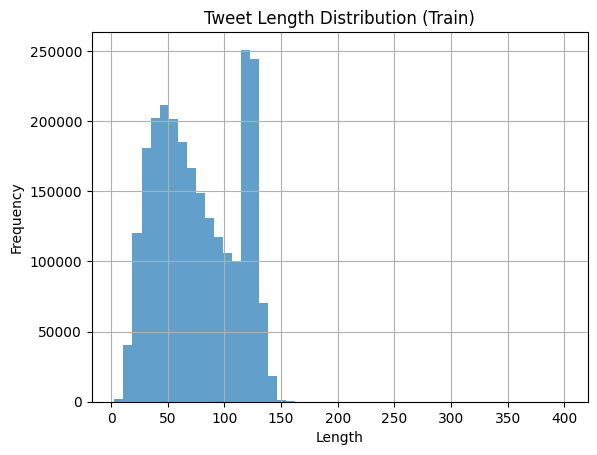

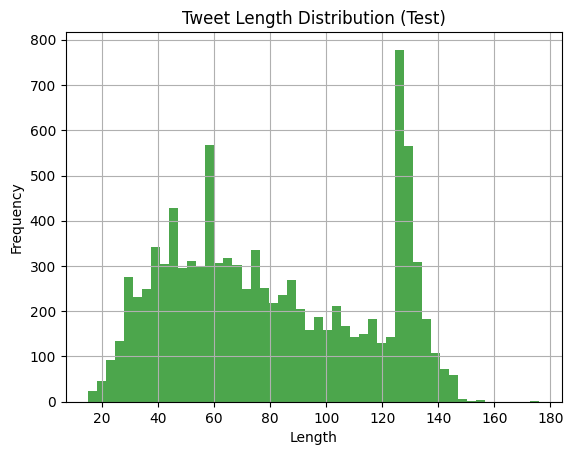

In [23]:
# Train Data
train_df['tweet_length'].hist(bins=50, alpha=0.7)
plt.title("Tweet Length Distribution (Train)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Test Data
test_df['tweet_length'].hist(bins=50, alpha=0.7, color='green')
plt.title("Tweet Length Distribution (Test)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


### 4. Common word Analysis

In [24]:
import re
from collections import Counter

# Tokenization function
def clean_tokenize(tweet):
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)           # Remove mentions
    tweet = re.sub(r'#', '', tweet)              # Remove hashtags symbol
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)    # Remove special characters
    return tweet.lower().split()

# Tokenize tweets
train_df['tokens'] = train_df['tweet'].apply(clean_tokenize)
test_df['tokens'] = test_df['tweet'].apply(clean_tokenize)


In [25]:
# Combine all tokens
all_tokens = [word for tokens in train_df['tokens'] for word in tokens]
word_freq = Counter(all_tokens)

# Display most common words
print("Most Common Words in Train Data:")
print(word_freq.most_common(20))


Most Common Words in Train Data:
[('user', 1606134), ('i', 994731), ('the', 761415), ('to', 703778), ('you', 601312), ('a', 528264), ('url', 526990), ('and', 456764), ('my', 401559), ('me', 342903), ('of', 339896), ('is', 311301), ('for', 306254), ('in', 297817), ('it', 279276), ('im', 229656), ('this', 223226), ('on', 204295), ('with', 201666), ('that', 201447)]


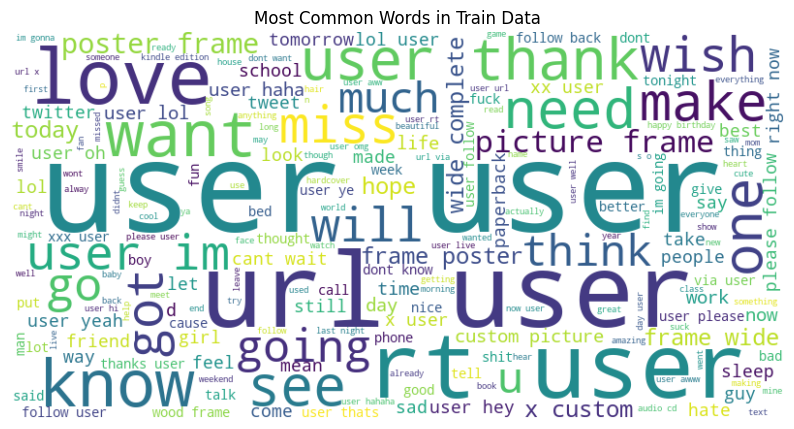

In [27]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Train Data")
plt.show()


### 5. Hashtag analysis